##Problem Statement
***The data is a KPI of call success/drop rate for a major telecom company through which the network performance is checked, we need to make a predictive machine learning model which can predict the call drop rate and also tell us the influence of the other features on the drop rates***

## Impoting the necessary libraries

In [291]:
!pip install -q pycaret

In [292]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pickle as pkl
from sklearn.metrics import mean_squared_error,r2_score

In [293]:
from pycaret.regression import *

## Reading the data and data Cleaning

In [294]:
data = pd.read_csv('/content/drive/MyDrive/KPI Report 19th JULY_UPE.csv')

In [295]:
data.head()

,Short name,ENB ID,cNum,SAP ID,SAP ID_cNum,Band,Sector,Scope,JIO_CENTER_ID_M,NE_STATE,...,UEActiveDLAvg.QCI9,coveragehole+coverageholeN,[0x034C]Ecc_S1SctpOutOfService,RAN_AVG_CQI_Nom_P1_BBH,RAN_AVG_CQI_Denom_P1_BBH,RAN_AVG_CQI_P1_BBH,Radio Network Availability,IP THR_BBH,IP_thru_BBH_Nom,IP_thru_BBH_Denom
0,"UE-UE-REM-06-A,ENB_10050-cNum0",10050,c0,I-UE-HNDI-ENB-I008,I-UE-HNDI-ENB-I008_c0,2300,0,Growth-1,UE-ABDD-JC01-0915,Active,...,2.82,41.0,0,4877095,499895,9.76,99.72,9.59,42805568,4463.69
1,"UE-UE-REM-06-A,ENB_10050-cNum1",10050,c1,I-UE-HNDI-ENB-I008,I-UE-HNDI-ENB-I008_c1,2300,1,Growth-1,UE-ABDD-JC01-0915,Active,...,2.40,26.0,0,5219987,553017,9.44,99.73,5.50,31018792,5637.56
2,"UE-UE-REM-06-A,ENB_10050-cNum15",10050,c15,I-UE-HNDI-ENB-I008,I-UE-HNDI-ENB-I008_c15,850,1,Growth-1,UE-ABDD-JC01-0915,Active,...,7.39,394.0,0,28428235,3635842,7.82,99.72,0.85,30316016,35550.38
3,"UE-UE-REM-06-A,ENB_10050-cNum2",10050,c2,I-UE-HNDI-ENB-I008,I-UE-HNDI-ENB-I008_c2,2300,2,Growth-1,UE-ABDD-JC01-0915,Active,...,3.56,61.0,0,10271977,1175429,8.74,99.73,1.91,37026768,19361.74
4,"UE-UE-REM-06-A,ENB_10050-cNum24",10050,c24,I-UE-HNDI-ENB-I008,I-UE-HNDI-ENB-I008_c24,850,2,Growth-1,UE-ABDD-JC01-0915,Active,...,3.06,175.0,0,10438139,1399811,7.46,99.72,2.54,22595872,8883.23


In [296]:
data.shape

(112415, 57)

In [297]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112415 entries, 0 to 112414
Data columns (total 57 columns):
 #   Column                                   Non-Null Count   Dtype  
---  ------                                   --------------   -----  
 0   Short name                               112415 non-null  object 
 1   ENB ID                                   112415 non-null  int64  
 2   cNum                                     112415 non-null  object 
 3   SAP ID                                   112415 non-null  object 
 4   SAP ID_cNum                              112415 non-null  object 
 5   Band                                     112415 non-null  int64  
 6   Sector                                   112415 non-null  int64  
 7   Scope                                    112415 non-null  object 
 8   JIO_CENTER_ID_M                          112415 non-null  object 
 9   NE_STATE                                 112415 non-null  object 
 10  RAN_Total Traffic_24hrs         

In [298]:
data.isna().sum()

Short name                                    0
ENB ID                                        0
cNum                                          0
SAP ID                                        0
SAP ID_cNum                                   0
Band                                          0
Sector                                        0
Scope                                         0
JIO_CENTER_ID_M                               0
NE_STATE                                      0
RAN_Total Traffic_24hrs                       0
RAN_Total Traffic [BBH]                       0
VOLTE Traffic                                 0
TotPrbDLAvg_BBH                             877
RRC_Connected_Users_BBH                       0
EnbQciDLByte.QCI9                             0
EnbQciULByte.QCI9                             0
RAN_VoLTE_Drop_Rate%_check_counter            0
RAN_VoLTE_Drop_Rate_Nom_check_counter         0
RAN_VoLTE Drop Rate_Denom_check_counter       0
Session Setup Success Rate %            

In [299]:
data.dropna(inplace = True) #dropping the null values

In [300]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 110781 entries, 0 to 112414
Data columns (total 57 columns):
 #   Column                                   Non-Null Count   Dtype  
---  ------                                   --------------   -----  
 0   Short name                               110781 non-null  object 
 1   ENB ID                                   110781 non-null  int64  
 2   cNum                                     110781 non-null  object 
 3   SAP ID                                   110781 non-null  object 
 4   SAP ID_cNum                              110781 non-null  object 
 5   Band                                     110781 non-null  int64  
 6   Sector                                   110781 non-null  int64  
 7   Scope                                    110781 non-null  object 
 8   JIO_CENTER_ID_M                          110781 non-null  object 
 9   NE_STATE                                 110781 non-null  object 
 10  RAN_Total Traffic_24hrs              

In [301]:
data.duplicated().sum() #check for duplicate records

0

In [302]:
# outliers influence
data.describe()

,ENB ID,Band,Sector,RAN_Total Traffic_24hrs,RAN_Total Traffic [BBH],VOLTE Traffic,TotPrbDLAvg_BBH,RRC_Connected_Users_BBH,EnbQciDLByte.QCI9,EnbQciULByte.QCI9,...,UEActiveDLAvg.QCI9,coveragehole+coverageholeN,[0x034C]Ecc_S1SctpOutOfService,RAN_AVG_CQI_Nom_P1_BBH,RAN_AVG_CQI_Denom_P1_BBH,RAN_AVG_CQI_P1_BBH,Radio Network Availability,IP THR_BBH,IP_thru_BBH_Nom,IP_thru_BBH_Denom
count,110781.000000,110781.000000,110781.000000,110781.000000,110781.000000,110781.000000,110781.000000,110781.000000,1.107810e+05,1.107810e+05,...,110781.000000,110781.000000,110781.000000,1.107810e+05,1.107810e+05,110781.000000,110781.000000,110781.000000,1.107810e+05,110781.000000
mean,7215.347803,1670.163205,1.112375,57.638716,4.392022,1563.221167,72.579237,34.667995,5.322859e+07,3.480085e+06,...,5.055508,308.917693,8.869806,1.364682e+07,1.556846e+06,8.973165,99.404529,4.615315,2.743696e+07,17659.431972
std,4408.166348,612.641776,0.991023,45.594015,2.928641,1968.445618,26.357850,28.182761,4.322191e+07,3.114572e+06,...,6.237605,534.326357,87.206462,1.240437e+07,1.414992e+06,1.307329,3.407012,5.937477,1.842397e+07,21521.743680
min,1.000000,850.000000,0.000000,0.010000,0.000000,0.010000,2.350000,0.010000,1.956000e+03,3.380000e+02,...,0.000000,0.000000,0.000000,2.392000e+03,2.460000e+02,2.670000,1.700000,0.010000,1.360000e+02,0.040000
25%,3268.000000,850.000000,0.000000,21.630000,1.990000,198.240000,53.940000,13.520000,1.918963e+07,1.100490e+06,...,1.090000,38.000000,0.000000,4.782722e+06,5.331430e+05,8.100000,100.000000,1.170000,1.227817e+07,3168.780000
50%,6760.000000,1800.000000,1.000000,45.310000,3.880000,792.850000,82.550000,27.440000,4.140924e+07,2.483075e+06,...,2.710000,123.000000,0.000000,1.030456e+07,1.168609e+06,8.940000,100.000000,2.360000,2.415058e+07,9673.530000
75%,11248.000000,2300.000000,2.000000,84.590000,6.160000,2260.800000,95.630000,48.490000,7.789284e+07,5.044604e+06,...,6.530000,352.000000,0.000000,1.798145e+07,2.030742e+06,9.810000,100.000000,5.430000,3.857454e+07,24218.170000
max,14794.000000,2300.000000,5.000000,353.430000,21.320000,24442.150000,99.090000,352.970000,3.418711e+08,2.546464e+07,...,75.330000,15927.000000,7117.000000,1.340513e+08,1.118462e+07,14.750000,100.000000,77.850000,1.354504e+08,349185.360000


<Axes: xlabel='RAN_VoLTE_Drop_Rate%_check_counter', ylabel='Density'>

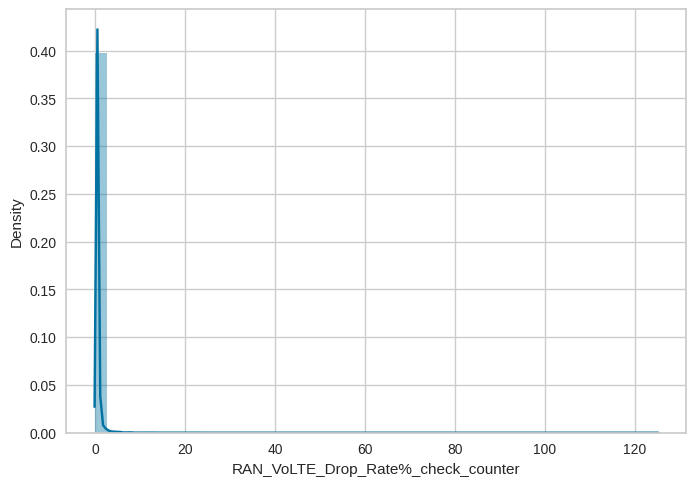

In [303]:
sns.distplot(data['RAN_VoLTE_Drop_Rate%_check_counter'])
# the target feature is very biased towards values near 0 which is visible from its skewed graph below

In [304]:
#Try1 - Removing outliers using IQR

'''q1 = data['RAN_VoLTE_Drop_Rate%_check_counter'].quantile(0.25)
q3 = data['RAN_VoLTE_Drop_Rate%_check_counter'].quantile(0.75)
IQR = q3-q1
data = data[(data['RAN_VoLTE_Drop_Rate%_check_counter']>q1-1.5*IQR) & (data['RAN_VoLTE_Drop_Rate%_check_counter']<q3+1.5*IQR)]'''

# This didn't worked as it removed values over 1 but we want value greter than 2 as well as these values are cruicial for our study
#as this threshold is decided by TRAI and above this level the drop are more and network performance is not that good

#Try 2 - taking values less than 9

'''data = data[data['RAN_VoLTE_Drop_Rate%_check_counter']<9]'''

#Still the target is skewed and biased

#Try 3 - Removing random values between 0 and 1 to make data more balanced

print("Total Records which are between 0 and 1 =",
      data[(data['RAN_VoLTE_Drop_Rate%_check_counter']>=0) & (data['RAN_VoLTE_Drop_Rate%_check_counter']<1)].shape[0])
print("Total Records greater than 1 =",
      data.shape[0]-data[(data['RAN_VoLTE_Drop_Rate%_check_counter']>=0) & (data['RAN_VoLTE_Drop_Rate%_check_counter']<1)].shape[0])

Total Records which are between 0 and 1 = 108094
Total Records greater than 1 = 2687


In [305]:
index = np.random.choice(data[((data['RAN_VoLTE_Drop_Rate%_check_counter']>=0) & (data['RAN_VoLTE_Drop_Rate%_check_counter']<1))].index,105407,replace = False)
index.shape
data.drop(index = index,inplace = True)
data = data.reset_index(drop = True)

In [306]:
data.shape

(5374, 57)

(5334, 57)

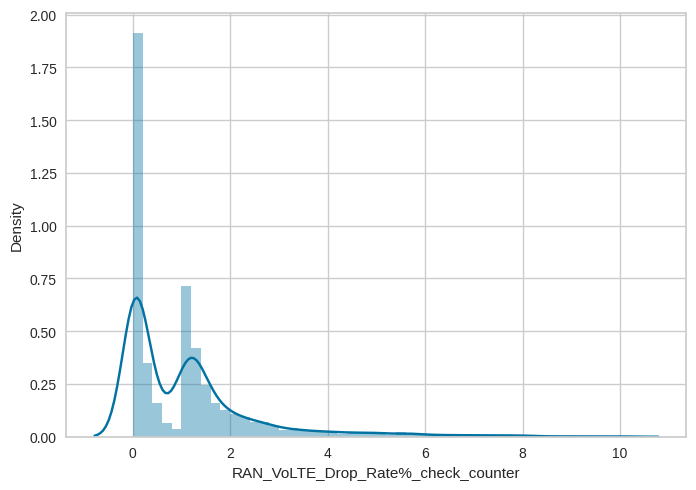

In [307]:
#Outliers Removal
index = data[data['RAN_VoLTE_Drop_Rate%_check_counter']>10].index
data.drop(index = index,inplace = True)
data = data.reset_index(drop = True)
sns.distplot(data['RAN_VoLTE_Drop_Rate%_check_counter'])
data.shape

In [308]:
c = []
for i in data.columns:
  if data[i].dtype != 'object' and i != 'RAN_VoLTE_Drop_Rate%_check_counter':
    c.append(i)
len(c)

45

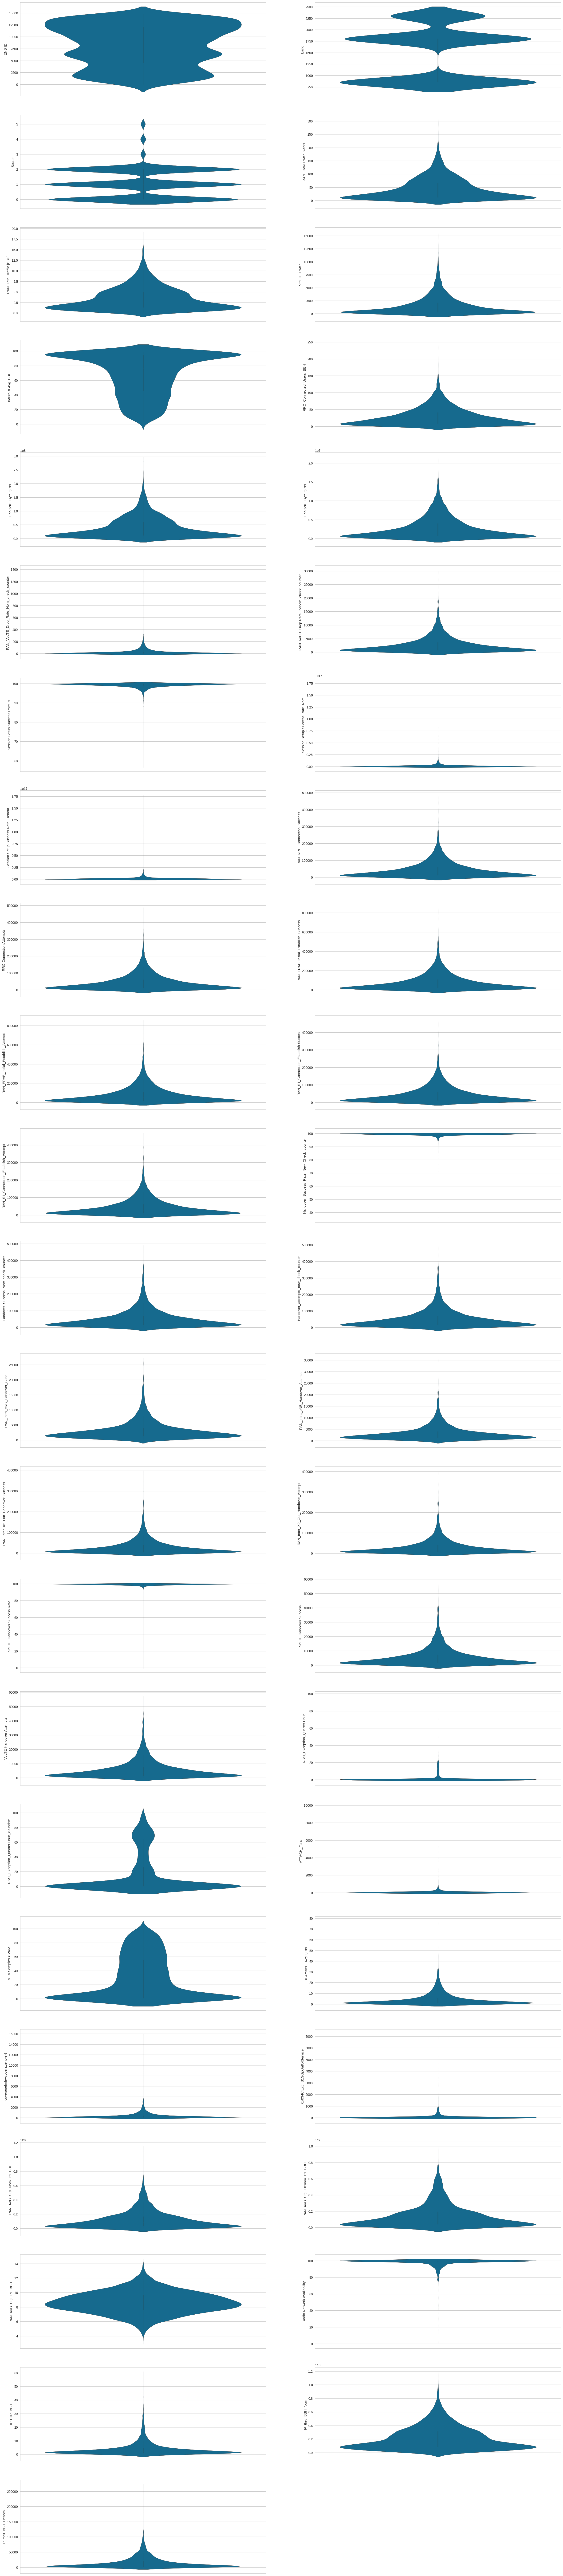

In [309]:
for idx,i in enumerate(c):
  plt.subplot(23,2,idx+1)
  sns.violinplot(data[i])
  plt.subplots_adjust(right = 3, top = 20)

## Essential Feature Selection

In [310]:
#Removing the features which are not required & whose data type is Object
obj_col_rem = []
for i in data.columns:
  if data[i].dtype == 'object':
    if len(data[i].value_counts().index)>50:
      obj_col_rem.append(i)
obj_col_rem

['Short name',
 'SAP ID',
 'SAP ID_cNum',
 'JIO_CENTER_ID_M',
 'NE_NAME.UE-AMBR Override',
 '% TA Samples < 2KM',
 '% TA Samples >2 & <5 KM',
 '% TA Samples >5 KM']

In [311]:
data.drop(obj_col_rem,axis = 1,inplace = True)

In [312]:
data.shape

(5334, 49)

In [313]:
le = LabelEncoder()

In [314]:
for i in data.columns:
  if data[i].dtype == 'object':
    data[i] = le.fit_transform(data[i])

In [315]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5334 entries, 0 to 5333
Data columns (total 49 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   ENB ID                                   5334 non-null   int64  
 1   cNum                                     5334 non-null   int64  
 2   Band                                     5334 non-null   int64  
 3   Sector                                   5334 non-null   int64  
 4   Scope                                    5334 non-null   int64  
 5   NE_STATE                                 5334 non-null   int64  
 6   RAN_Total Traffic_24hrs                  5334 non-null   float64
 7   RAN_Total Traffic [BBH]                  5334 non-null   float64
 8   VOLTE Traffic                            5334 non-null   float64
 9   TotPrbDLAvg_BBH                          5334 non-null   float64
 10  RRC_Connected_Users_BBH                  5334 no

In [317]:
#Removing the features with high multi-collinearity
def vif_feature_selection(data,threshold = 5):
  def VIF(data):
    df = pd.DataFrame()
    df['columns'] = data.columns
    df['VIF'] = np.round([variance_inflation_factor(data,x) for x in range(data.shape[1])],2)
    return df
  vif_result = VIF(data)
  while max(vif_result['VIF'])>threshold:
    idx = vif_result['VIF'].idxmax()
    data.drop(columns = [data.columns[idx]],inplace = True)
    vif_result = VIF(data)
  return data,vif_result

In [318]:
data,df = vif_feature_selection(data)

In [319]:
df

,columns,VIF
0,ENB ID,1.19
1,cNum,1.46
2,Band,1.51
3,Sector,1.03
4,Scope,1.89
5,NE_STATE,1.01
6,TotPrbDLAvg_BBH,2.94
7,RAN_VoLTE_Drop_Rate%_check_counter,1.71
8,RAN_VoLTE_Drop_Rate_Nom_check_counter,1.67
9,Session Setup Success Rate %,0.55


## Exploratory Data Analysis

In [320]:
data.corr()

,ENB ID,cNum,Band,Sector,Scope,NE_STATE,TotPrbDLAvg_BBH,RAN_VoLTE_Drop_Rate%_check_counter,RAN_VoLTE_Drop_Rate_Nom_check_counter,Session Setup Success Rate %,...,ATTACH_Fails,% TA Samples > 2KM,coveragehole+coverageholeN,[0x034C]Ecc_S1SctpOutOfService,RAN_AVG_CQI_Nom_P1_BBH,RAN_AVG_CQI_P1_BBH,Radio Network Availability,IP THR_BBH,IP_thru_BBH_Nom,IP_thru_BBH_Denom
ENB ID,1.000000,0.053749,-0.062635,-0.029512,0.658795,0.020282,-0.090690,0.163846,0.068641,-0.067722,...,-0.009432,0.295811,0.006945,-0.008369,-0.131764,-0.106717,-0.096589,0.027113,-0.168016,-0.066359
cNum,0.053749,1.000000,-0.213180,-0.059678,0.040412,-0.010093,-0.058805,0.228386,0.075857,-0.167840,...,0.044027,0.214082,0.014538,0.032625,-0.043378,-0.149146,-0.046328,-0.259924,-0.437035,-0.119446
Band,-0.062635,-0.213180,1.000000,0.121635,-0.033221,0.012691,-0.147474,-0.210675,-0.256402,0.023328,...,-0.065226,-0.194931,-0.300053,-0.125500,-0.365720,0.350253,0.078654,0.215159,0.049075,-0.199199
Sector,-0.029512,-0.059678,0.121635,1.000000,0.001889,-0.004599,0.027669,-0.065641,-0.041954,0.036471,...,-0.031266,-0.074759,-0.048403,-0.018447,-0.008934,0.012905,0.016322,0.006921,0.090161,0.030489
Scope,0.658795,0.040412,-0.033221,0.001889,1.000000,-0.003204,-0.054715,0.128548,0.071003,-0.007221,...,-0.024053,0.035724,-0.007846,-0.020124,-0.055725,-0.035270,-0.031228,0.023827,-0.076538,-0.056395
NE_STATE,0.020282,-0.010093,0.012691,-0.004599,-0.003204,1.000000,-0.067410,0.022565,-0.019956,0.005272,...,-0.008919,0.050604,-0.025786,-0.009851,-0.042497,-0.004463,-0.058082,0.014630,-0.040894,-0.033721
TotPrbDLAvg_BBH,-0.090690,-0.058805,-0.147474,0.027669,-0.054715,-0.067410,1.000000,-0.130178,0.254693,-0.005150,...,0.119671,0.047370,0.386669,0.105101,0.652358,-0.240643,0.019378,-0.611655,0.597855,0.637443
RAN_VoLTE_Drop_Rate%_check_counter,0.163846,0.228386,-0.210675,-0.065641,0.128548,0.022565,-0.130178,1.000000,0.521177,-0.205205,...,0.160699,0.164104,-0.005268,0.266402,-0.060424,-0.090591,-0.279857,-0.086883,-0.268715,-0.098536
RAN_VoLTE_Drop_Rate_Nom_check_counter,0.068641,0.075857,-0.256402,-0.041954,0.071003,-0.019956,0.254693,0.521177,1.000000,-0.219867,...,0.391190,0.101842,0.332502,0.483925,0.330786,-0.047375,-0.074361,-0.166190,0.090683,0.262837
Session Setup Success Rate %,-0.067722,-0.167840,0.023328,0.036471,-0.007221,0.005272,-0.005150,-0.205205,-0.219867,1.000000,...,-0.665499,-0.306456,-0.121092,-0.126013,0.067578,0.153249,0.052473,0.134090,0.205940,0.005981


<Axes: xlabel='RAN_VoLTE_Drop_Rate%_check_counter', ylabel='RAN_VoLTE_Drop_Rate_Nom_check_counter'>

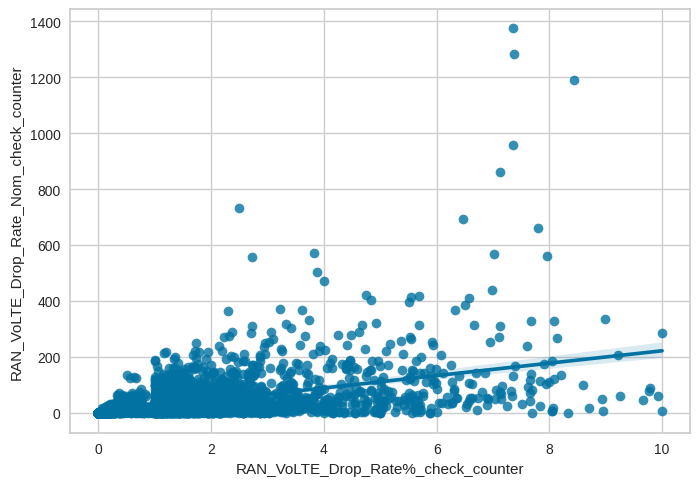

In [321]:
# as per the correlation table RAN_VoLTE_Drop_Rate%_check_counter have a strong relation with RAN_VoLTE_Drop_Rate_Nom_check_counter
sns.regplot(x = data['RAN_VoLTE_Drop_Rate%_check_counter'],y = data['RAN_VoLTE_Drop_Rate_Nom_check_counter'])

## Splitting the data and Training the model

In [342]:
X = data.drop('RAN_VoLTE_Drop_Rate%_check_counter',axis = 1)
Y = data['RAN_VoLTE_Drop_Rate%_check_counter']

In [343]:
xtrain,xtest,ytrain,ytest = train_test_split(X,Y,test_size = 0.2,random_state = 42)

In [362]:
scalar = StandardScaler()

In [363]:
xtrain = scalar.fit_transform(xtrain)
xtest = scalar.transform(xtest)

In [365]:
se = setup(data,target = 'RAN_VoLTE_Drop_Rate%_check_counter', session_id = 222)

,Description,Value
0,Session id,222
1,Target,RAN_VoLTE_Drop_Rate%_check_counter
2,Target type,Regression
3,Original data shape,"(5334, 27)"
4,Transformed data shape,"(5334, 27)"
5,Transformed train set shape,"(3733, 27)"
6,Transformed test set shape,"(1601, 27)"
7,Numeric features,26
8,Preprocess,True
9,Imputation type,simple


In [366]:
best = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.2313,0.2256,0.4721,0.8906,0.1290,0.2801,0.8170
xgboost,Extreme Gradient Boosting,0.2408,0.2315,0.4776,0.8881,0.1307,0.3070,0.7750
rf,Random Forest Regressor,0.2294,0.2409,0.4869,0.8840,0.1243,0.2406,4.9570
gbr,Gradient Boosting Regressor,0.2728,0.2675,0.5149,0.8694,0.1521,0.5658,1.8540
et,Extra Trees Regressor,0.2696,0.2974,0.5431,0.8560,0.1482,0.3487,1.8640
dt,Decision Tree Regressor,0.3392,0.5008,0.7041,0.7569,0.1877,0.3313,0.1610
br,Bayesian Ridge,0.6068,1.0297,1.0100,0.5023,0.3525,2.0351,0.0410
ridge,Ridge Regression,0.6062,1.0310,1.0105,0.5016,0.3520,2.0056,0.0360
lr,Linear Regression,0.6117,1.0399,1.0152,0.4972,0.3555,2.0256,0.8150
en,Elastic Net,0.6400,1.0759,1.0332,0.4794,0.3745,2.2629,0.0500


Processing:   0%|          | 0/81 [00:00<?, ?it/s]

In [367]:
best.fit(xtrain,ytrain)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.081979 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4528
[LightGBM] [Info] Number of data points in the train set: 4267, number of used features: 25
[LightGBM] [Info] Start training from score 1.106972


LGBMRegressor(n_jobs=-1, random_state=222)

## Predicting the Data and evaluating the model

In [368]:
ypred = best.predict(xtest)

In [400]:
print(f'The mse score for model is {mean_squared_error(ytest,ypred)}')
print(f'The r2 score for model is {r2_score(ytest,ypred)}')
print(f'The rmse score for model is {np.sqrt(mean_squared_error(ytest,ypred))}')

The mse score for model is 0.19970955509692317
The r2 score for model is 0.9017066226564809
The rmse score for model is 0.44688875024654984


In [ ]:
#adjusted r2 score
'''Adjusted R2 = 1-[(1-R2)*(n-1)/(n-k-1)]
where R2 is the r2 of the model, n = no. of observations, k = no. of predictor variables'''

In [401]:
n = len(ytest)
k = xtest.shape[1]
score = r2_score(ytest,ypred)
adj_r2 = 1-(((1-score)*(n-1))/(n-k-1))
adj_r2

0.899249288222893

Text(0, 0.5, 'Actual')

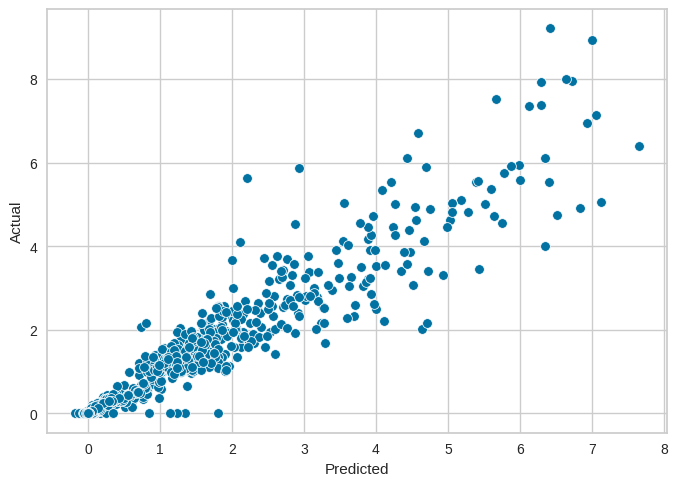

In [397]:
sns.scatterplot(x = ypred,y = ytest)
plt.xlabel('Predicted')
plt.ylabel('Actual')
#A linear realtionship b/w the data points is visible so we can say that the model is performing good

Text(0.5, 1.0, 'Residual Graph')

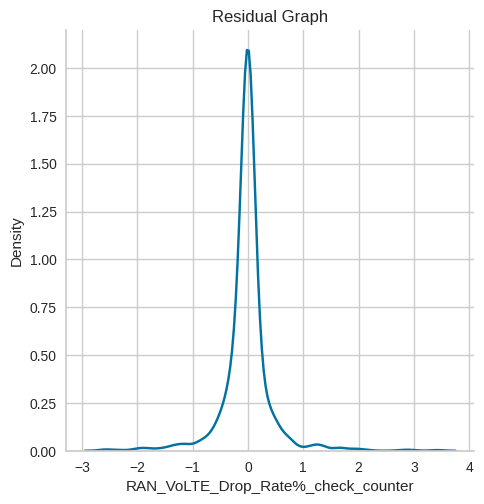

In [398]:
#residuals graph
resid = ytest-ypred
sns.displot(resid,kind = 'kde')
plt.title('Residual Graph')
#from the below graph we cn see that the residuals follow a normal distribution, very close to a stnadard normal distribution

Text(0, 0.5, 'Residuals')

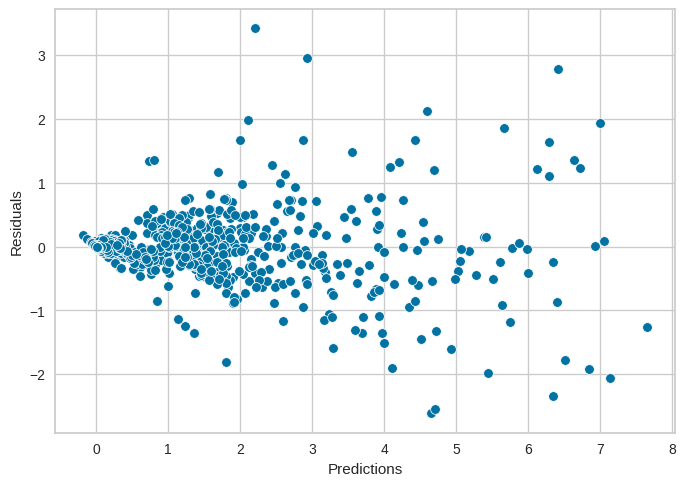

In [399]:
sns.scatterplot(x = ypred, y = resid)
plt.xlabel('Predictions')
plt.ylabel('Residuals')
# no relation is observed it's simialar to a noise

***from the above three observations and the metrics result we can say that the model is performing well***

In [389]:
x_0 = xtest[2]
x_0 = np.array(x_0).reshape(1,-1)
best.predict(x_0)

array([0.15827766])

In [388]:
ytest[2:3]

3088    0.17
Name: RAN_VoLTE_Drop_Rate%_check_counter, dtype: float64

## Creating the pickle file for the model

In [394]:
pkl.dump(scalar,open('scalar.pkl','wb'))
pkl.dump(best,open('model.pkl','wb'))

In [395]:
scalar = pkl.load(open('scalar.pkl','rb'))
model = pkl.load(open('model.pkl','rb'))

In [396]:
x_0 = xtest[2]
x_0 = np.array(x_0).reshape(1,-1)
model.predict(x_0)

array([0.15827766])